In [5]:
import os
import pandas as pd
os.chdir(r'C:\Users\Min\Documents\Python Scripts\포트폴리오수업\프로젝트 2. 로스만 상점매출 예측\data')

In [14]:
train = pd.read_csv("lspoons_train.csv")
test = pd.read_csv("lspoons_test.csv")
store = pd.read_csv("store.csv")

In [15]:
train.head()

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0


id: 
store: 각 상점의 고유 번호  
sales: 각 상점이 그 날짜에 올린 매출   
promo: 해당 날짜에 판매촉진행사를 진행하고 있는가의 여부 ( yes:1, no:0)   

# StateHoliday 변수 변환하기

기존에 StateHoliday를 StateHoliday의 종류에 따라 분할하기 위해   
pd.get_dummies(data= , columns=[])를 사용한다  

<strong>pd.get_dummies</strong> <br>
 + pd.get_dummies 처리 : 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다. 
 + 결측값 처리(dummy_na = True 옵션) :  Nan을 생성하여 결측값도 인코딩하여 처리해준다.

In [16]:
train = pd.get_dummies(columns=['StateHoliday'],data=train)
test = pd.get_dummies(columns=['StateHoliday'],data=test)

In [18]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [20]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [19]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


train데이터에는 있는 StateHoliday_b, StateHoliday_c가 test데이터에는 없다 그러면 어떻게 해야하나?  
test데이터에 임의로 stateHoliday_b,StateHoliday_c 칼럼을 만들어주면 된다.  
test데이터와 train 데이터는 구조가(칼럼의 갯수가) 같아야하므로

In [25]:
test['StateHoliday_b']=0
test['StateHoliday_c']=0
# StateHoliday_b와 StateHoliday_c는 test에 없는 값이므로 0으로 값을 넣어줘야 한다.

In [26]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# Date 변수를 활용

In [31]:
pd.to_datetime(train['Date']).dtypes
#datetime 형태로 형식을 바꿔주게 된다면 날짜의 요일, 연도, 월, 날짜간 계산, 몇 번째 주인지를 쉽게 알 수 있게 해줄 수 있게 된다.

dtype('<M8[ns]')

In [32]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [33]:
# to_datetime으로 바꾼 데이터 활용하기
# 1. 연도 보고싶어:  .dt.year
train['Date'].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
62239    2014
62240    2014
62241    2014
62242    2014
62243    2014
Name: Date, Length: 62244, dtype: int64

In [38]:
#2.무슨 요일인지 알고 싶어
train['Date'].dt.weekday

0        4
1        4
2        4
3        3
4        3
        ..
62239    4
62240    4
62241    4
62242    4
62243    4
Name: Date, Length: 62244, dtype: int64

In [39]:
# 몇월인지 알고 싶어
train['Date'].dt.month

0        5
1        5
2        5
3        4
4        4
        ..
62239    8
62240    8
62241    8
62242    8
62243    8
Name: Date, Length: 62244, dtype: int64

In [40]:
train['Weekday'] = train['Date'].dt.weekday
test['Weekday'] = test['Date'].dt.weekday

In [41]:
train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

In [42]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month

In [44]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Weekday,Year,Month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


In [50]:
train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','Weekday','Year','Month']]

,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Weekday,Year,Month
0,1,0,0,1,0,0,4,2015,5
1,1,0,0,1,0,0,4,2015,5
2,1,0,0,1,0,0,4,2015,5
3,1,0,1,0,0,0,3,2015,4
4,1,0,1,0,0,0,3,2015,4
...,...,...,...,...,...,...,...,...,...
62239,1,1,1,0,0,0,4,2014,8
62240,1,1,1,0,0,0,4,2014,8
62241,1,1,1,0,0,0,4,2014,8
62242,1,1,1,0,0,0,4,2014,8


# 베이스라인 모델

In [46]:
from xgboost import XGBRegressor

In [47]:
xgb = XGBRegressor(n_estimators=300,learning_rate=0.1,random_state=2020)

In [53]:
xgb.fit(train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','Weekday','Year','Month']],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
test['Sales']=xgb.predict(test[['Promo','SchoolHoliday','StateHoliday_0',
                                'StateHoliday_a','StateHoliday_b','StateHoliday_c',
                                'Weekday','Year','Month']])

In [58]:
test[['id','Sales']].to_csv('submission.csv',index=False)

# 변수 선택하기
 + 변수 중요도를 이용하여 선택
 + 각각의 input변수가 Sales변수에 얼마나 영향을 미치는지를 수치화 한 것


In [59]:
xgb.feature_importances_

array([7.0119292e-01, 5.6813221e-02, 8.5970303e-03, 3.9727520e-03,
       1.7045721e-03, 8.6084956e-06, 8.5364915e-02, 5.7804018e-02,
       8.4541962e-02], dtype=float32)

In [60]:
input_var =['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a',
            'StateHoliday_b','StateHoliday_c','Weekday','Year','Month']

In [62]:
#딕셔너리로 해서 DataFrame만들기
imp_df = pd.DataFrame({'var':input_var
                     ,'imp':xgb.feature_importances_ } )

In [64]:
imp_df = imp_df.sort_values(['imp'],ascending=False)

In [66]:
imp_df

,var,imp
0,Promo,0.701193
6,Weekday,0.085365
8,Month,0.084542
7,Year,0.057804
1,SchoolHoliday,0.056813
2,StateHoliday_0,0.008597
3,StateHoliday_a,0.003973
4,StateHoliday_b,0.001705
5,StateHoliday_c,0.000009


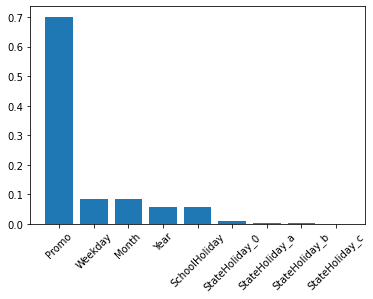

In [76]:
import matplotlib.pyplot as plt
plt.bar(x=imp_df['var'],height=imp_df['imp'])
_=plt.xticks(rotation=45)

In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
#모델의 성능을 측정하는 라이브러리 cross_cal_score()
cross_val_score(xgb,train[input_var],train['Sales'],scoring="neg_mean_squared_error",cv=3)
     # 사용된 모델,input변수,목표값, scoring(성능 측정의 단위가 될 값, cv(fold의 갯수)

array([ -7442398.68110158, -10165475.69817356,  -7896996.52747543])

In [82]:
cross_val_score(xgb,train[['Promo','Weekday','Month','Year','SchoolHoliday']],
                train['Sales'],
                scoring="neg_mean_squared_error",
                cv=3)

array([ -7437417.60656606, -10109891.53781048,  -7579785.74399885])

In [85]:
import numpy as np

In [87]:
score_list=[]
selected_varnum=[]

In [89]:
for i in range(1,10):
    selected_var=imp_df['var'].iloc[:i].to_list()
    scores= cross_val_score(xgb,train[selected_var],
                train['Sales'],
                scoring="neg_mean_squared_error",
                cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9


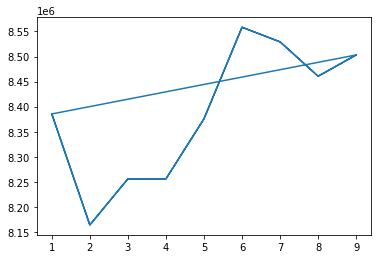

In [96]:
plt.plot(selected_varnum,score_list)

상위 변수 2개만을 썼을 때가 가장 낮은 에러점수를 가지므로 Promo와 Weekday만을 가지고 예측하는 것이 좋다

In [84]:
cross_val_score(xgb,train[['Promo','Weekday']],
                train['Sales'],
                scoring="neg_mean_squared_error",
                cv=3)

array([ -7241548.38898523, -10134534.97381444,  -7116067.92521244])

In [98]:
xgb.fit(train[['Promo','Weekday']],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
test['Sales']=xgb.predict(test[['Promo','Weekday']])

In [100]:
test[['id','Sales']].to_csv("submission1.csv",index=False)

# 보조데이터 사용하기 (Store)

In [101]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [102]:
train.loc[train['Store']==1]

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Weekday,Year,Month
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
303,15232,1,2015-04-29,5775,1,0,1,0,0,0,2,2015,4
603,15532,1,2015-04-28,5199,1,0,1,0,0,0,1,2015,4
903,15832,1,2015-04-27,5575,1,0,1,0,0,0,0,2015,4
1213,16142,1,2015-04-25,4318,0,0,1,0,0,0,5,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,75904,1,2014-08-06,5337,1,1,1,0,0,0,2,2014,8
61227,76156,1,2014-08-05,5433,1,1,1,0,0,0,1,2014,8
61479,76408,1,2014-08-04,5655,1,1,1,0,0,0,0,2014,8
61740,76669,1,2014-08-02,4731,0,1,1,0,0,0,5,2014,8


In [104]:
store.loc[store['Store']==1]
#store의 고정적인 특징을 나타내는 것이므로 1개의 row만 나오게 된다.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## store를 기준으로 train과 store를 merge하기

In [109]:
#같은 store값을 가지고 있는 것들끼리 붙여주겠다 merge쓰기
train = pd.merge(train,store,on=['Store'],how='left')
test = pd.merge(test,store,on=['Store'],how='left')

In [114]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,...,5,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,...,5,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,...,5,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,...,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,...,4,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [111]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Weekday,...,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,2015-07-01,1,0,1,0,0,0,2,...,7939.036133,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,9,2015-07-01,1,1,1,0,0,0,2,...,7939.036133,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
2,2,11,2015-07-01,1,0,1,0,0,0,2,...,7939.036133,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
3,3,12,2015-07-01,1,0,1,0,0,0,2,...,7939.036133,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
4,4,14,2015-07-01,1,1,1,0,0,0,2,...,7939.036133,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


## Feature Engineering

### 경쟁사가 몇 개월전에 오픈했는지를 칼럼으로 만들기

In [116]:
12*(train['Year']-train['CompetitionOpenSinceYear']) # 현재시점에서 몇 개월이나 차이 나는지 알아보는 것

0         48.0
1          NaN
2        156.0
3         84.0
4        180.0
         ...  
62239     36.0
62240    120.0
62241      0.0
62242     96.0
62243      NaN
Length: 62244, dtype: float64

In [125]:
train['CompetitionOpen']=12*(train['Year']-train['CompetitionOpenSinceYear'])+ \
(train['Month']-train['CompetitionOpenSinceMonth'])
# 몇 개월전에 경쟁사가 오픈을 했는지를 계산하는 과정


test['CompetitionOpen']=12*(test['Year']-test['CompetitionOpenSinceYear'])+ \
(test['Month']-test['CompetitionOpenSinceMonth'])

### 프로모션이 몇개월 전에 시행됐는지

In [128]:
train['WeekOfYear']=train['Date'].dt.weekofyear
test['WeekOfYear']=test['Date'].dt.weekofyear

<ipython-input-128-8685c675e845>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['WeekOfYear']=train['Date'].dt.weekofyear
<ipython-input-128-8685c675e845>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['WeekOfYear']=test['Date'].dt.weekofyear


In [131]:
#1달은 4주로 이루어 졌으므로 /4를 하게 되면 개월수가 나오게 된다.
train['PromoOPen']=12*(train['Year']-train['Promo2SinceYear'])+\
(train['WeekOfYear']-train['Promo2SinceYear'])/4

test['PromoOPen']=12*(test['Year']-test['Promo2SinceYear'])+\
(test['WeekOfYear']-test['Promo2SinceYear'])/4

In [132]:
train.dtypes

id                                    int64
Store                                 int64
Date                         datetime64[ns]
Sales                                 int64
Promo                                 int64
SchoolHoliday                         int64
StateHoliday_0                        uint8
StateHoliday_a                        uint8
StateHoliday_b                        uint8
StateHoliday_c                        uint8
Weekday                               int64
Year                                  int64
Month                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
CompetitionOpen                 

### dummies를 이용해서 범주형 변수를 onehot으로 바꾸기

In [135]:
# pd.get_dummies는 object타입을 0,1로 onehot인코딩으로 해주는 라이브러리!!
train = pd.get_dummies(columns=['StoreType'],data=train)
test = pd.get_dummies(columns=['StoreType'],data=test)

In [136]:
train = pd.get_dummies(columns=['Assortment'],data=train)
test = pd.get_dummies(columns=['Assortment'],data=test)

train = pd.get_dummies(columns=['PromoInterval'],data=train)
test = pd.get_dummies(columns=['PromoInterval'],data=test)

In [139]:
train.dtypes

id                                         int64
Store                                      int64
Date                              datetime64[ns]
Sales                                      int64
Promo                                      int64
SchoolHoliday                              int64
StateHoliday_0                             uint8
StateHoliday_a                             uint8
StateHoliday_b                             uint8
StateHoliday_c                             uint8
Weekday                                    int64
Year                                       int64
Month                                      int64
CompetitionDistance                      float64
CompetitionOpenSinceMonth                float64
CompetitionOpenSinceYear                 float64
Promo2                                     int64
Promo2SinceWeek                          float64
Promo2SinceYear                          float64
CompetitionOpen                          float64
WeekOfYear          

# 2차 모델링

In [141]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Weekday', 'Year', 'Month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOPen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'와 Promo2SinceWeek', 'Promo2SinceYear'는 Feature Engineering으로 새로운 칼럼인  'CompetitionOpen', 'PromoOPen' 을 만들었으므로  위 4개는 삭제해준다

In [151]:
input_var=['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Weekday', 'Year', 'Month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOPen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [152]:
xgb=XGBRegressor(n_estimators=300,learning_rate=0.1,random_state=2020)

In [153]:
xgb.fit(train[input_var],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
imp_df=pd.DataFrame({'var':input_var,'imp':xgb.feature_importances_})
imp_df=imp_df.sort_values(['imp'],ascending=False)
imp_df

,var,imp
0,Promo,0.131427
18,Assortment_a,0.089364
10,Promo2,0.089099
9,CompetitionDistance,0.081642
22,"PromoInterval_Jan,Apr,Jul,Oct",0.069595
16,StoreType_c,0.057189
11,CompetitionOpen,0.050940
14,StoreType_a,0.050491
8,Month,0.044020
13,PromoOPen,0.042846


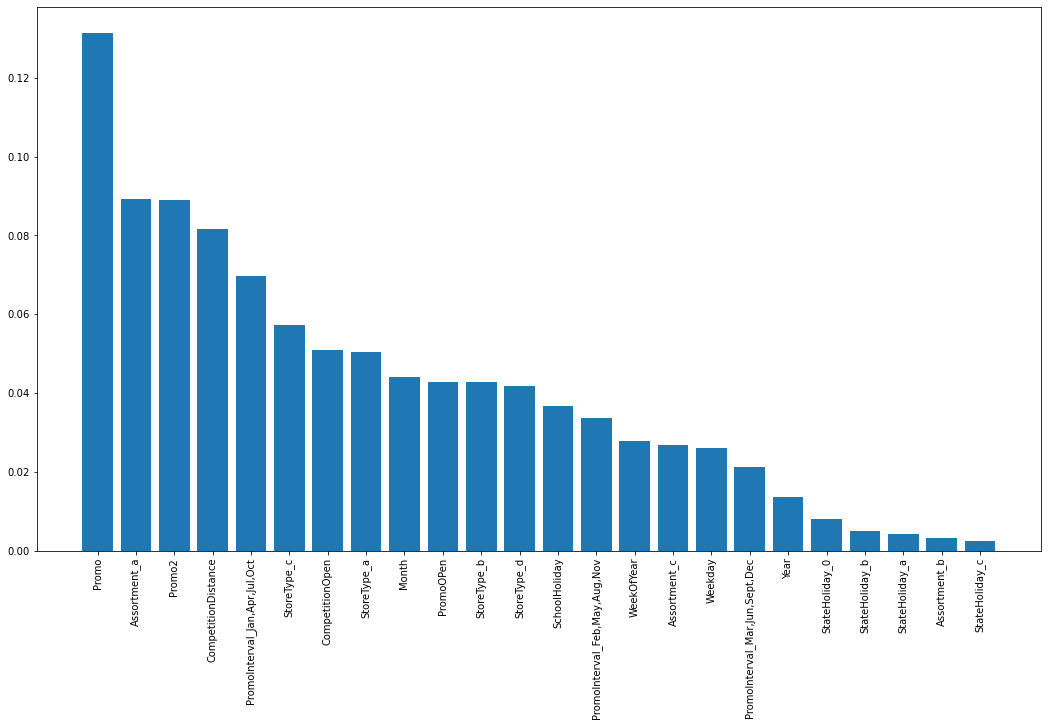

In [168]:
plt.figure(figsize=(18,10))
plt.bar(data=imp_df,x=imp_df['var'],height=imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [169]:
score_list=[]
selected_varnum=[]

In [172]:
for i in range(1,25):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb,
                             train[selected_var],
                             train['Sales'],
                             scoring='neg_mean_squared_error',
                             cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


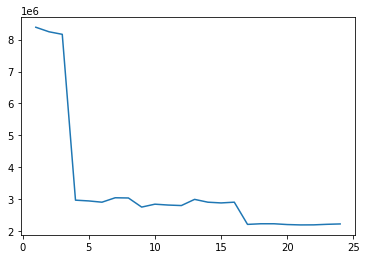

In [174]:
plt.plot(selected_varnum,score_list)

In [177]:
input_var = imp_df['var'].iloc[:17].tolist()

In [178]:
input_var

['Promo',
 'Assortment_a',
 'Promo2',
 'CompetitionDistance',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'StoreType_c',
 'CompetitionOpen',
 'StoreType_a',
 'Month',
 'PromoOPen',
 'StoreType_b',
 'StoreType_d',
 'SchoolHoliday',
 'PromoInterval_Feb,May,Aug,Nov',
 'WeekOfYear',
 'Assortment_c',
 'Weekday']

In [179]:
cross_val_score(xgb,train[input_var],train['Sales'],scoring="neg_mean_squared_error",cv=3)

array([-1851049.62506742, -3120322.91076385, -1672187.01095951])

In [180]:
xgb.fit(train[input_var],train['Sales'])
test['Sales']=xgb.predict(test[input_var])
test[['id','Sales']].to_csv('submission2.csv',index=False)

In [181]:
test[['id','Sales']]

,id,Sales
0,0,5605.755859
1,1,7990.736816
2,2,9236.215820
3,3,9743.019531
4,4,6356.464355
...,...,...
14924,14924,5129.421387
14925,14925,5183.373535
14926,14926,4554.812012
14927,14927,9583.489258


# 파라미터 튜닝

In [196]:
estim_list=[100,200,300,400,500,600,700,800,900]
score_list = []

In [197]:
for i in estim_list:
    xgb= XGBRegressor(n_estimators=i,learning_rate=0.1,random_state=2020)
    scores = cross_val_score(xgb,train[input_var],train['Sales'],scoring='neg_mean_squared_error',cv=3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


In [198]:
score_list

[2905744.881706961,
 2354600.5332349725,
 2214519.848930258,
 2155336.921444779,
 2129548.7516120225,
 2112979.9368336876,
 2101530.995047157,
 2097030.697714243,
 2096721.7315713328]

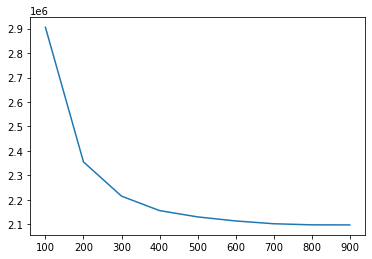

In [199]:
plt.plot(estim_list,score_list)

In [200]:
 xgb= XGBRegressor(n_estimators=700,learning_rate=0.1,random_state=2020)

In [201]:
xgb.fit(train[input_var],train['Sales'])
test['Sales']=xgb.predict(test[input_var])
test[['id','Sales']]

,id,Sales
0,0,5095.570801
1,1,8001.262207
2,2,9038.793945
3,3,10162.818359
4,4,6459.084961
...,...,...
14924,14924,5143.839355
14925,14925,5718.734375
14926,14926,4892.499512
14927,14927,10152.786133


In [203]:
test[['id','Sales']].to_csv('submission3.csv',index=False)